In [ ]:
import pandas as pd
from pathlib import Path

df = pd.read_csv(Path("..\\data\\raw\\train_FD001.txt"), sep="\s+", header=None)
df.dropna(axis=1, how="all", inplace=True)
df.columns = ['unit', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]

print(df.head())
print(df.describe())
print(df['unit'].nunique()) # how many engines
print(df.groupby('unit')['cycle'].max().describe())  # lifecycle stats per engine


   unit  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0     1      1       -0.0007       -0.0004         100.0    518.67    641.82   
1     1      2        0.0019       -0.0003         100.0    518.67    642.15   
2     1      3       -0.0043        0.0003         100.0    518.67    642.35   
3     1      4        0.0007        0.0000         100.0    518.67    642.35   
4     1      5       -0.0019       -0.0002         100.0    518.67    642.37   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1589.70   1400.60     14.62  ...     521.66    2388.02    8138.62   
1   1591.82   1403.14     14.62  ...     522.28    2388.07    8131.49   
2   1587.99   1404.20     14.62  ...     522.42    2388.03    8133.23   
3   1582.79   1401.87     14.62  ...     522.86    2388.08    8133.83   
4   1582.85   1406.22     14.62  ...     522.19    2388.04    8133.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  

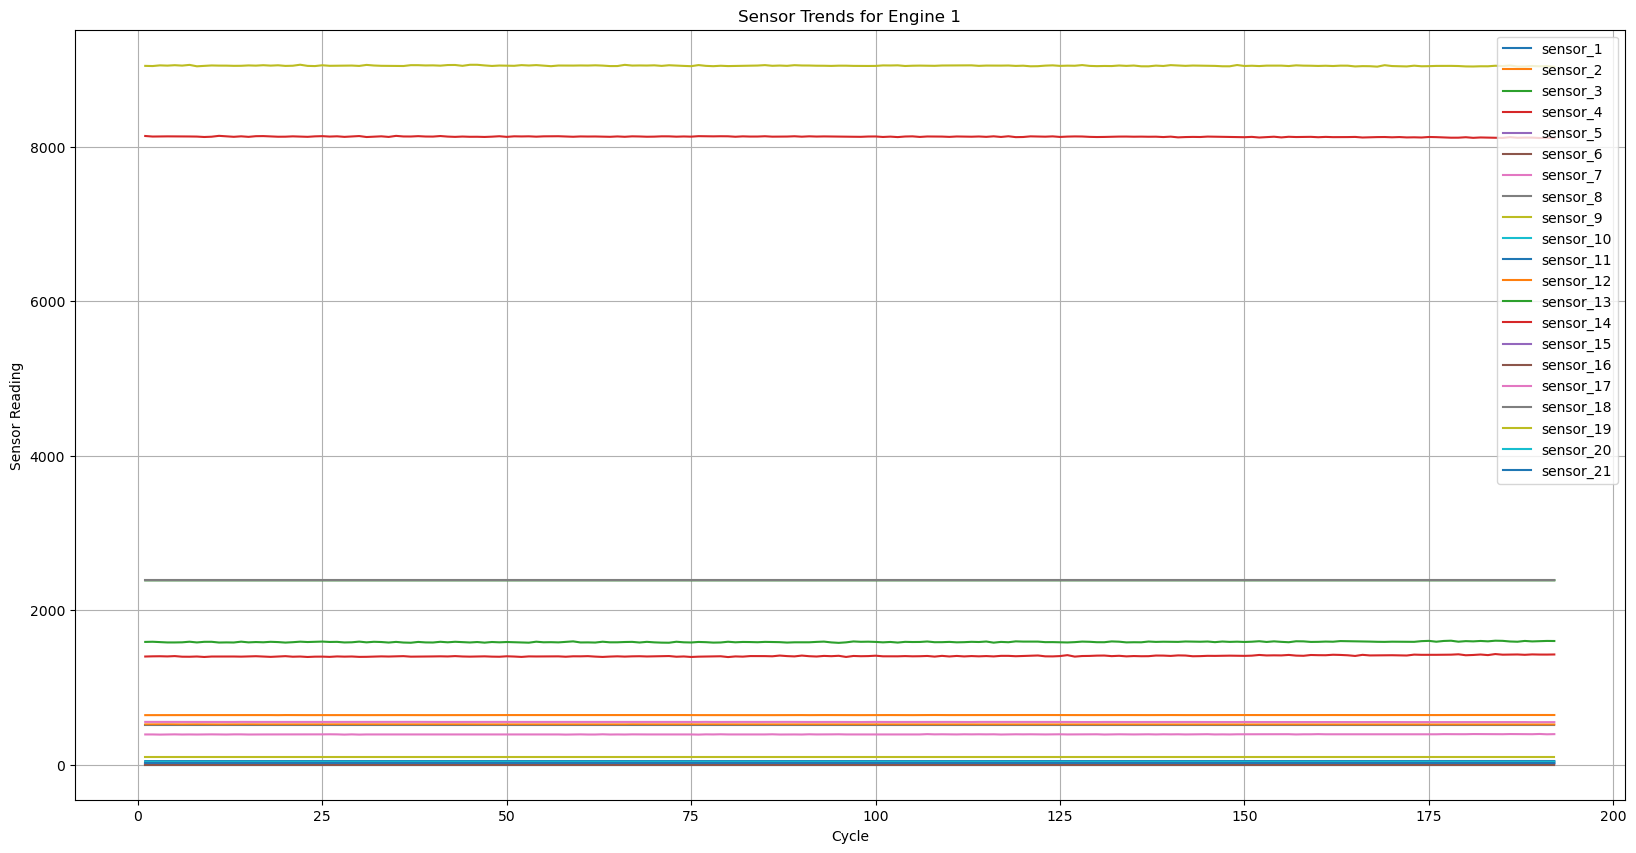

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/cleaned_FD001.csv")
engine_id = 1
df_engine = df[df['unit'] == engine_id]

plt.figure(figsize=(20, 10))

for sensor in df_engine.columns[5:26]:
    plt.plot(df_engine['cycle'], df_engine[sensor], label=sensor)

plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.title(f"Sensor Trends for Engine {engine_id}")
plt.legend()
plt.grid()
plt.show()
